In [1]:
import matplotlib.pyplot as plt
import numpy as np
from graph_tool.all import *
import pandas as pd
from collections import Counter

# Protein-protein interaction
### Importing the data set

In [2]:
# Importing the protein-protein interaction dataset

proteins_dataset = pd.read_csv('protein_interaction.txt', names = ['node1', 'node2', 'weight'], sep = '\t')

# Checking the dataset

proteins_dataset.head()

,node1,node2,weight
0,YLR291C,YNL229C,CCSB-Y2H
1,YLR291C,YCR086W,CCSB-Y2H
2,YLR291C,YPR062W,CCSB-Y2H
3,YJL085W,YBR057C,CCSB-Y2H
4,YLR227C,YDR208W,CCSB-Y2H


### Extracting numerical values from the nodes

In [3]:
# Extracting the values

protein_node1 = list(proteins_dataset['node1'])
protein_node2 = list(proteins_dataset['node2'])

# Checking the len of list of all proteins

diff_proteins = list(Counter(protein_node1 + protein_node2).keys())
protein_list_len = len(diff_proteins)

# Replacing them with numeric values

protein_num_temp = list(range(0,protein_list_len))

# Iterating through the data

for j in range(0,len(diff_proteins)):
    for i in range(0,len(protein_node1)):
        if protein_node1[i] == diff_proteins[j]:
            protein_node1[i] = protein_num_temp[j]
            
for j in range(0,len(diff_proteins)):
    for i in range(0,len(protein_node2)):
        if protein_node2[i] == diff_proteins[j]:
            protein_node2[i] = protein_num_temp[j]

In [4]:
# Converting the proteins into numerical values

diff_proteins_num = []

for i in range(0,len(diff_proteins)):
    diff_proteins_num.append(i)

### Creating the graph

In [14]:
# Creating the graph

g_proteins = Graph()
g_proteins.set_directed(False)

# Adding the nodes

#for i in range(0,len(diff_proteins_num)):
#    g_proteins.add_vertex(diff_proteins_num[i])
    
# Adding the vertices

for i in range(0,len(protein_node1)):
    g_proteins.add_edge(protein_node1[i], protein_node2[i])

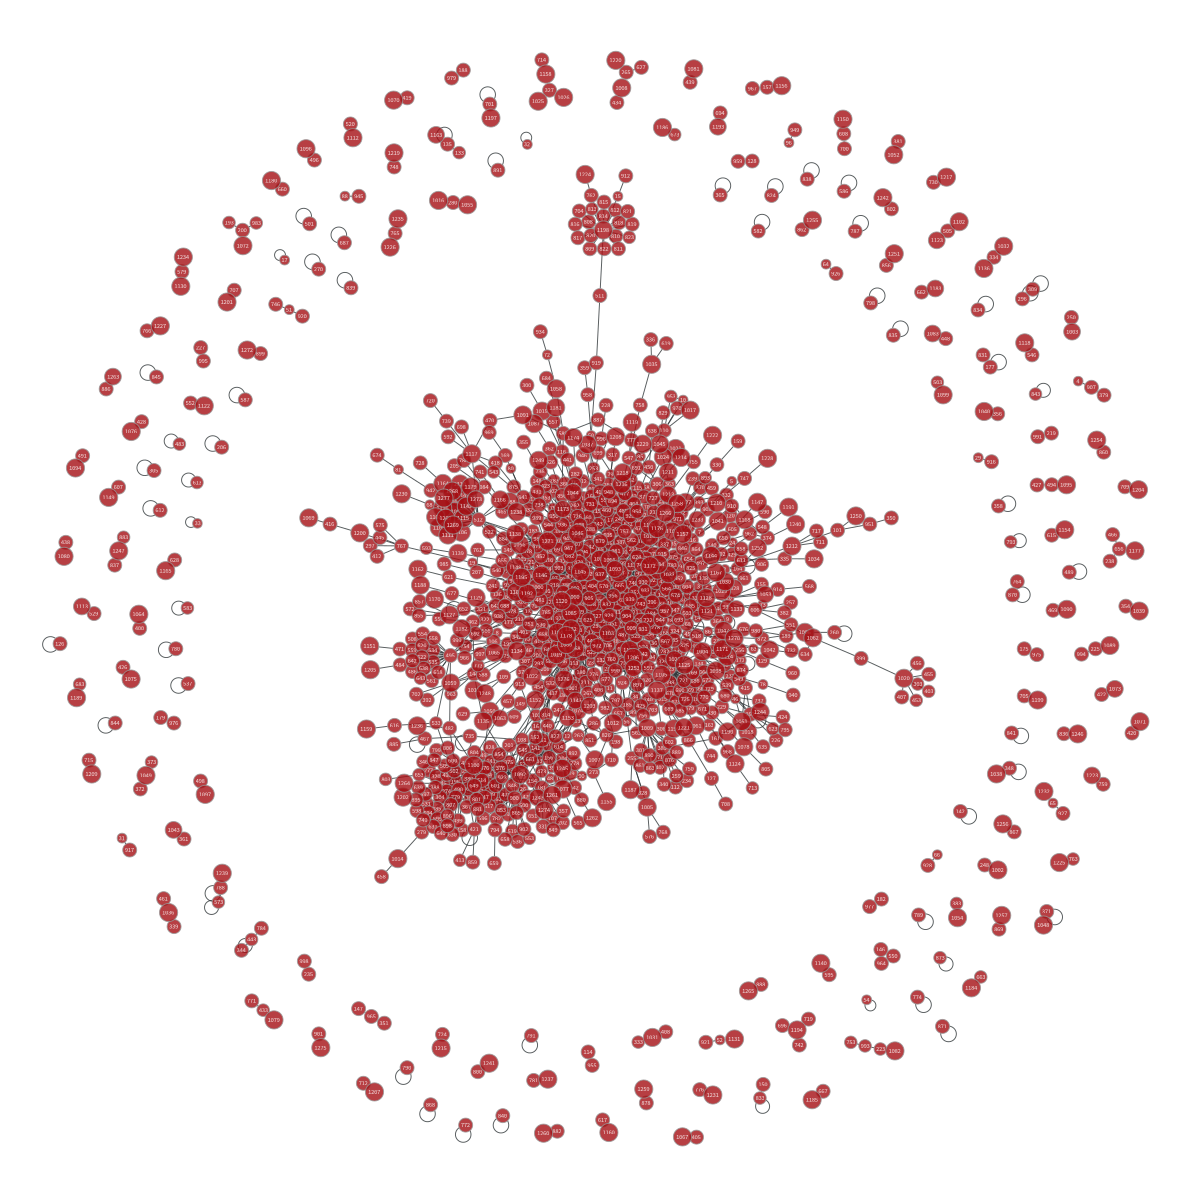

In [16]:
# Drawing and saving the graph

graph_draw(g_proteins, vertex_text=g_proteins.vertex_index)#, output="protein_interaction.pdf")

plt.show()

### Fitting the stochastic block model 

In [19]:
state = minimize_blockmodel_dl(g_proteins)
state.draw(output="protein_block_model.pdf")
#state.draw(pos=g_proteins.vp["pos"], vertex_shape=state.get_blocks())#, output="polbooks_blocks_mdl.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f266be82250, at 0x7f266a4f12e0>

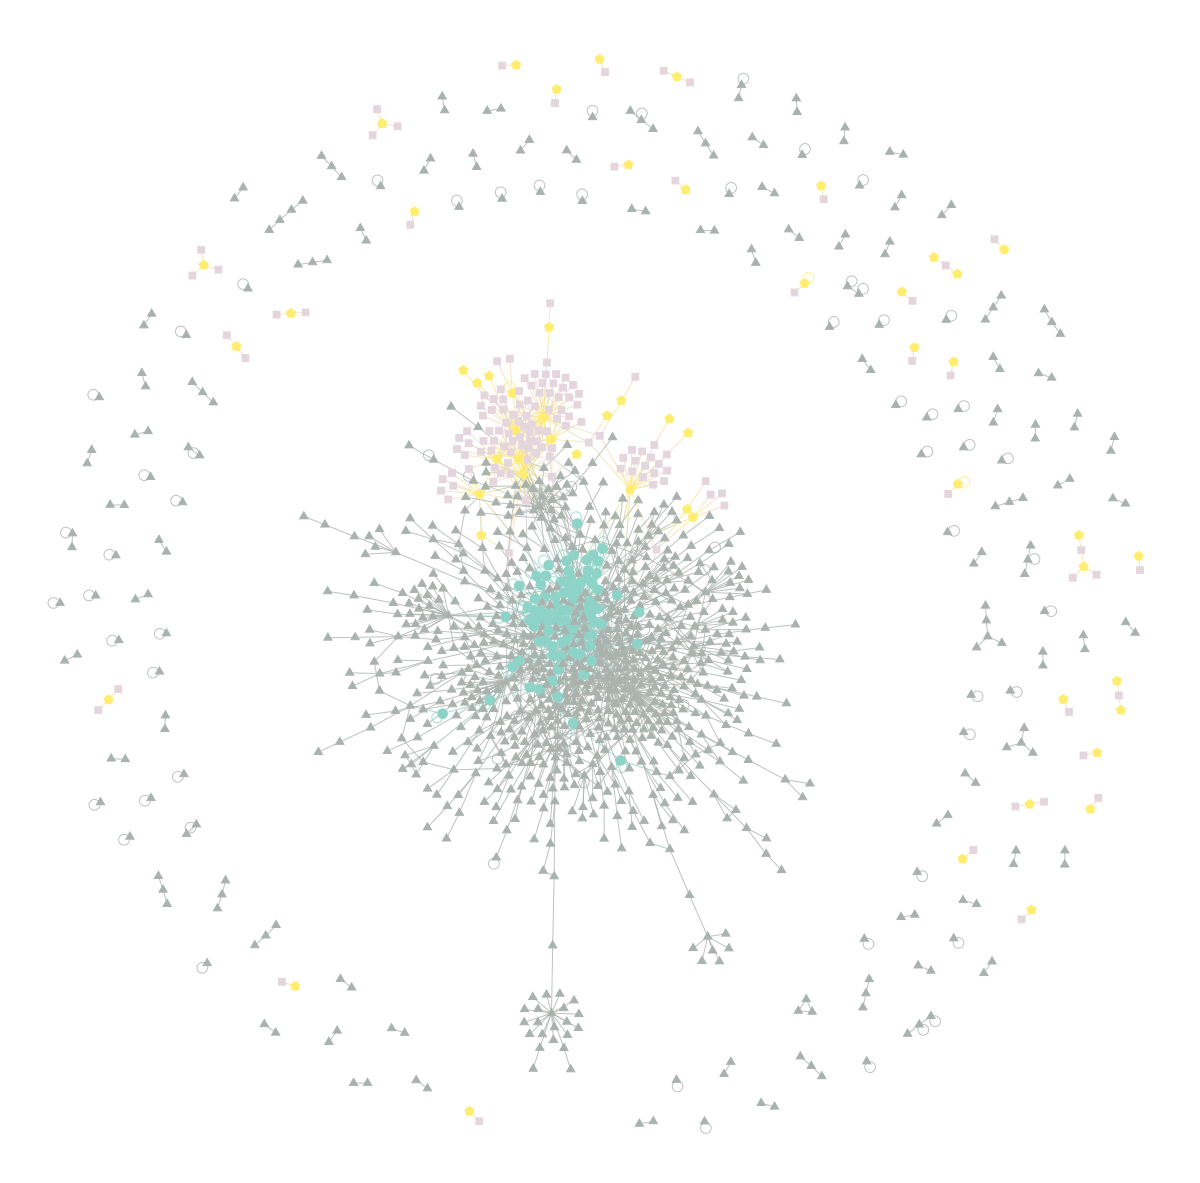

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f266be82250, at 0x7f26a42e5790>

In [22]:
state.draw(vertex_shape=state.get_blocks())

In [25]:
state

<BlockState object with 4 blocks (4 nonempty), degree-corrected, for graph <Graph object, undirected, with 1278 vertices and 1809 edges, at 0x7f266be82250>, at 0x7f266be8f6d0>

In [24]:
state.get_nested_partitions()

AttributeError: 'BlockState' object has no attribute 'get_nested_partitions'